### What it 'CLAHE'?
Equalizes the histogram of a grayscale image using Contrast Limited Adaptive Histogram Equalization.

### How it is compared to what we disscused in the lecture?
details are more sharpened than using cv2.equalizeHist

In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np 

### Apply it to Grayscaled and Colored carkyo image and compare to our results.

In [2]:
img = cv2.imread('13_output.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)

clahe = cv2.createCLAHE(clipLimit=1.5)
img_CLAHE_gray = clahe.apply(img_gray)

b, g, r = cv2.split(img)
beq = clahe.apply(b)
geq = clahe.apply(g)
req = clahe.apply(r)
img_CLAHE_coloured = cv2.merge([beq, geq, req])


img_equalize_gray = cv2.equalizeHist(img_gray)


b, g, r = cv2.split(img)
beq = cv2.equalizeHist(b)
geq = cv2.equalizeHist(g)
req = cv2.equalizeHist(r)
img_equalize_coloured = cv2.merge([beq, geq, req])

while(1):
    cv2.imshow('img_CLAHE_gray', img_CLAHE_gray)
    cv2.imshow('img_equalize_gray', img_equalize_gray)

    cv2.imshow('img_CLAHE_coloured', img_CLAHE_coloured)
    cv2.imshow('img_equalize_coloured', img_equalize_coloured)

    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cv2.destroyAllWindows()


### Conclusion
using CLAHE is better in equalizing histogram of image and output is more sharpened and takes clipLimit parameter which can be used to get better output

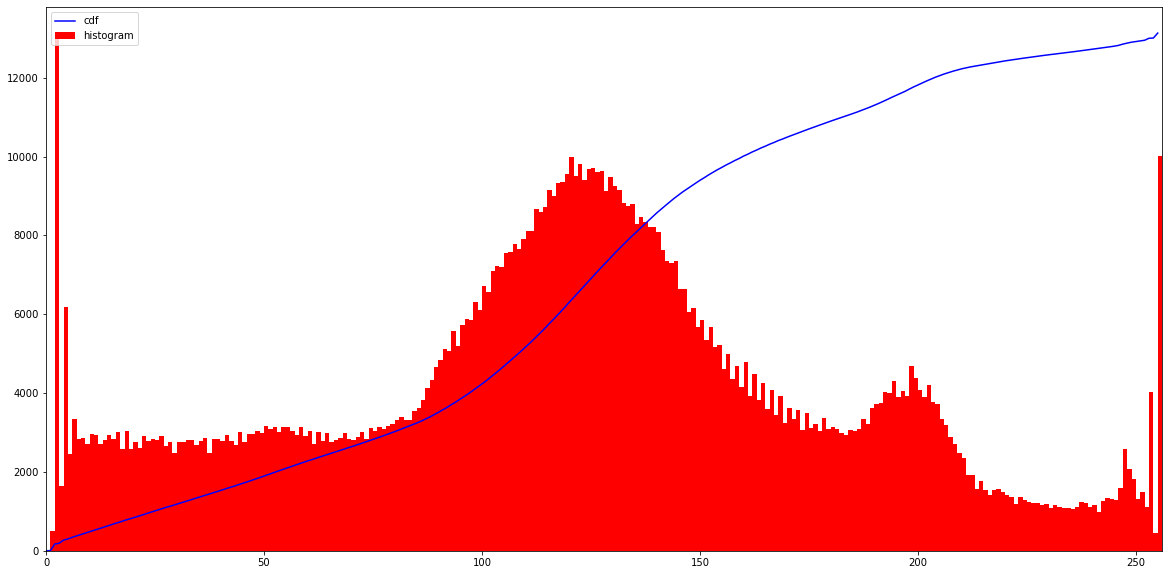

In [3]:
hist,bins = np.histogram(img_CLAHE_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_CLAHE_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

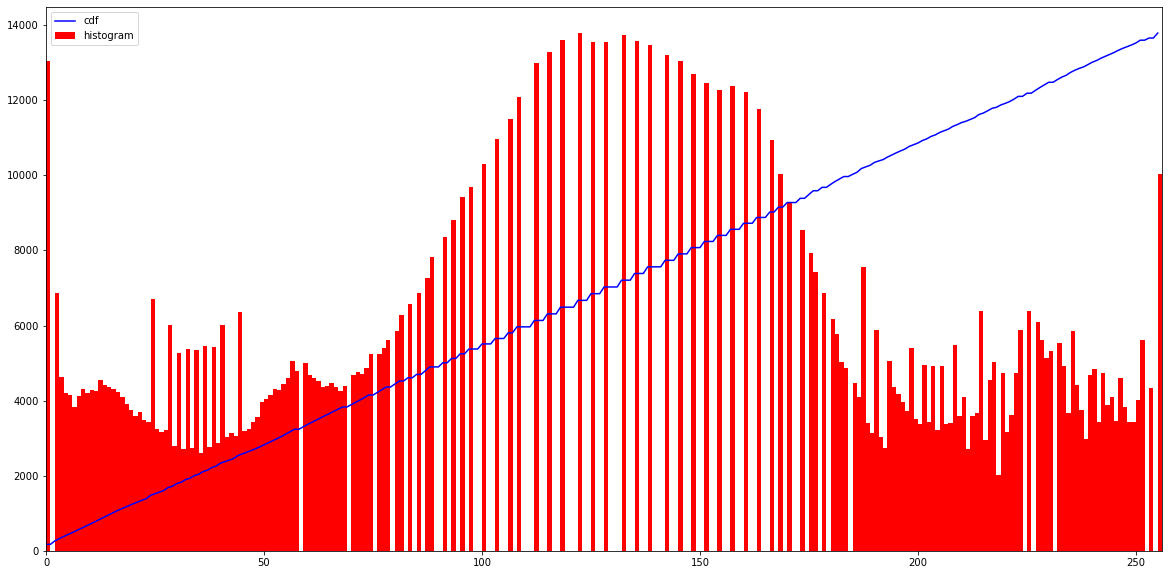

In [4]:
hist,bins = np.histogram(img_equalize_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_equalize_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### observation
cdf_normalized line in equalizeHist tends to be a straight line but in CLAHE isnot a straight line